# Projeto - Relatório de fechamento de mercado por e-mail.


### Desafio:

* Construir um e-mail que chegue na caixa de entrada todos os dias com informações de fechamento do Ibovespa e dólar.

<br>

   **Passo 1** - Importar os módulos e bibliotecas.
   
   **Passo 2** - Pegar dados do Ibovespa e do Dólar no Yahoo Finance.
   
   **Passo 3** - Manipular os dados para deixá-los nos formatos necessários para fazer as contas.
   
   **Passo 4** - Calcular o retorno diário, mensal e anual.
   
   **Passo 5** - Localizar, dentro das tabelas de retornos, os valores de fechamento de mercado que irão pro texto  anexado no e-mail.
   
   **Passo 6** - Fazer os gráficos dos ativos.
   
   **Passo 7** - Enviar o e-mail.

# Passo 1: Importando os módulos necessários

In [1]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import win32com.client as win32

# Passo 2: Pegar dados no Yahoo Finance

In [2]:
codigos_de_negociacao = ["^BVSP", "BRL=X"]  

hoje = datetime.datetime.now()
cinco_anos_atras = hoje - datetime.timedelta(days = 5*365)

dados_mercado = yf.download(codigos_de_negociacao, cinco_anos_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
               BRL=X          ^BVSP   BRL=X          ^BVSP   BRL=X   
Date                                                                 
2018-03-05    3.2496   86023.000000  3.2496   86023.000000  3.2623   
2018-03-06    3.2410   85653.000000  3.2410   85653.000000  3.2428   
2018-03-07    3.2080   85484.000000  3.2080   85484.000000  3.2395   
2018-03-08    3.2429   84985.000000  3.2429   84985.000000  3.2652   
2018-03-09    3.2661   86371.000000  3.2661   86371.000000  3.2674   
...              ...            ...     ...            ...     ...   
2023-02-27    5.2078  105711.000000  5.2078  105711.000000  5.2108   
2023-02-28    5.1997  104932.000000  5.1997  104932.000000  5.2399   
2023-03-01    5.2359  104385.000000  5.2359  104385.000000  5.2367   
2023-03-02    5.1783  103326.000000  5.1783  103326.000000  5.2258   
2023-03-03       NaN  104217.273438     NaN  104217.273438     NaN   

                                Low                   Open                 \
                    ^BVSP     BRL=X          ^BVSP   BRL=X          ^BVSP   
Date                                                                        
2018-03-05   86165.000000  3.249400   85053.000000  3.2505   85292.000000   
2018-03-06   86931.000000  3.216300   85653.000000  3.2410   86023.000000   
2018-03-07   85653.000000  3.206100   84397.000000  3.2064   85653.000000   
2018-03-08   85830.000000  3.208700   84491.000000  3.2413   85510.000000   
2018-03-09   86389.000000  3.238800   84749.000000  3.2661   84987.000000   
...                   ...       ...            ...     ...            ...   
2023-02-27  106402.000000  5.168874  105227.000000  5.2078  105807.000000   
2023-02-28  106794.000000  5.180500  104932.000000  5.1997  105706.000000   
2023-03-01  105497.000000  5.188100  103105.000000  5.2359  104933.000000   
2023-03-02  104912.000000  5.174952  103321.000000  5.1783  104375.000000   
2023-03-03  104440.117188       NaN  103322.710938     NaN  103325.609375   

           Volume              
            BRL=X       ^BVSP  
Date                           
2018-03-05    0.0   3425200.0  
2018-03-06    0.0   3608600.0  
2018-03-07    0.0   3456800.0  
2018-03-08    0.0   3694700.0  
2018-03-09    0.0   3481500.0  
...           ...         ...  
2023-02-27    0.0   9570700.0  
2023-02-28    0.0  15672400.0  
2023-03-01    0.0  19853000.0  
2023-03-02    0.0  14738800.0  
2023-03-03    NaN         0.0  

[1305 rows x 12 columns]

# Passo 3.1: Manipulando os dados - seleção e exclusão de dados 

In [3]:
dados_fechamento = dados_mercado['Adj Close']

dados_fechamento.columns = ['dolar', 'ibovespa']

dados_fechamento = dados_fechamento.dropna()

dados_fechamento

,dolar,ibovespa
Date,,
2018-03-05,3.2496,86023.0
2018-03-06,3.2410,85653.0
2018-03-07,3.2080,85484.0
2018-03-08,3.2429,84985.0
2018-03-09,3.2661,86371.0
...,...,...
2023-02-24,5.1362,105873.0
2023-02-27,5.2078,105711.0
2023-02-28,5.1997,104932.0


# Passo 3.2: Manipulando os dados - Criando tabelas com outros timeframes. 

In [6]:
dados_anuais = dados_fechamento.resample("Y").last()

dados_mensais = dados_fechamento.resample("M").last()

dados_anuais
#dados_mensais

,dolar,ibovespa
Date,,
2018-12-31,3.8715,87887.0
2019-12-31,4.0223,115964.0
2020-12-31,5.2086,119306.0
2021-12-31,5.7027,104822.0
2022-12-31,5.2668,110031.0
2023-12-31,5.1783,103326.0


# Passo 4 - Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos. 

In [32]:
retorno_anual = dados_anuais.pct_change().dropna()
retorno_mensal = dados_mensais.pct_change().dropna()
retorno_diario = dados_fechamento.pct_change().dropna()

#retorno_anual
retorno_mensal
#retorno_diario

,dolar,ibovespa
Date,,
2018-04-30,0.041816,0.008774
2018-05-31,0.076921,-0.108703
2018-06-30,0.036358,-0.051997
2018-07-31,-0.034046,0.088740
2018-08-31,0.112792,-0.032088
2018-09-30,-0.032927,0.034743
2018-10-31,-0.079113,0.101863
2018-11-30,0.042332,0.023792
2018-12-31,0.005323,-0.018066


# Passo 5 - Localizar o fechamento do dia anterior, retorno no mês e retorno no ano.

* loc -> referenciar elementos a partir do nome
* iloc -> selecionar elementos como uma matriz

In [29]:
# retorno_jan_26_2022 = retorno_diario.loc['2022-01-26', 'dolar']
# retorno_jan_26_2022_iloc = retorno_diario.iloc[1, 0]

retorno_diario_dolar = retorno_diario.iloc[-1, 0]
retorno_diario_ibov = retorno_diario.iloc[-1, 1]

retorno_mensal_dolar = retorno_mensal.iloc[-1, 0]
retorno_mensal_ibov = retorno_mensal.iloc[-1, 1]

retorno_anual_dolar = retorno_anual.iloc[-1, 0]
retorno_anual_ibov = retorno_anual.iloc[-1, 1]

In [30]:
retorno_diario_dolar = round((retorno_diario_dolar * 100), 2)
retorno_diario_ibov = round((retorno_diario_ibov * 100), 2)

retorno_mensal_dolar = round((retorno_mensal_dolar * 100), 2)
retorno_mensal_ibov = round((retorno_mensal_ibov * 100), 2) 

retorno_anual_dolar = round((retorno_anual_dolar * 100), 2)
retorno_anual_ibov = round((retorno_anual_ibov * 100), 2)

print(retorno_anual_dolar)
print(retorno_anual_ibov)

display(retorno_anual)

-1.68
-6.09


,dolar,ibovespa
Date,,
2019-12-31,0.038951,0.319467
2020-12-31,0.294931,0.028819
2021-12-31,0.094862,-0.121402
2022-12-31,-0.076438,0.049694
2023-12-31,-0.016803,-0.060937


# Passo 6 - Fazer os gráficos da performance do último dos ativos

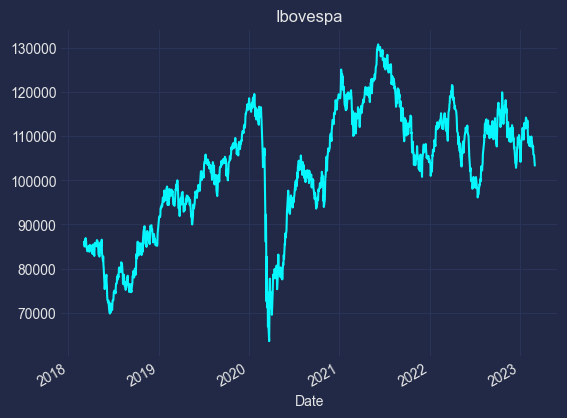

In [17]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "ibovespa", use_index = True, legend = False)

plt.title("Ibovespa")

plt.savefig('ibovespa.png', dpi = 300)

plt.show()

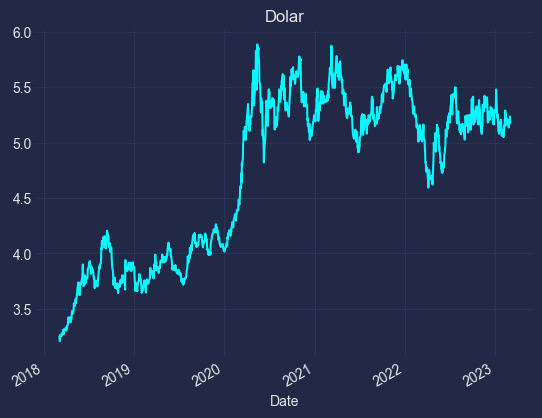

In [31]:
plt.style.use("cyberpunk")

dados_fechamento.plot(y = "dolar", use_index = True, legend = False)

plt.title("Dolar")

plt.savefig('dolar.png', dpi = 300)

plt.show()

# Passo 7: Enviar e-mail

In [12]:
outlook = win32.Dispatch("outlook.application")

email = outlook.CreateItem(0)

In [33]:
email.To = "brenno@varos.com.br"
email.Subject = "Relatório Diário"
email.Body = f'''Prezado diretor, segue o relatório diário:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_anual_ibov}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_ibov}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_diario_ibov}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_anual_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_dolar}%.

No último dia útil, o fechamento do Dólar foi de {retorno_diario_dolar}%.


Abs,

O melhor estagiário do mundo

'''

anexo_ibovespa = r'C:\Users\rmnf\Mercado-Financeiro\Varos\ibovespa.png'
anexo_dolar = r'C:\Users\rmnf\Mercado-Financeiro\Varos\dolar.png'

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)

email.Send()


NameError: name 'email' is not defined